### Importação dos dados



In [136]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [137]:
#listando o faturamento de cada loja
def  faturamento(loja, nome_loja):
  faturamento = loja['Preço'].sum()
  print(f'Faturamento da {nome_loja} R${faturamento:,.2f}')
  return faturamento


#mostranto o faturamento geral"
def total ():
  total = faturamento(loja, 'Loja-1') + faturamento(loja2, 'Loja-2') + faturamento(loja3, 'Loja-3') + faturamento(loja4, 'Loja-4')
  print(f'Faturamento Total:R$ {total:,.2f}')
  return total


valor = total()
print(f"R$:{valor:,.2f}")


Faturamento da Loja-1 R$1,534,509.12
Faturamento da Loja-2 R$1,488,459.06
Faturamento da Loja-3 R$1,464,025.03
Faturamento da Loja-4 R$1,384,497.58
Faturamento Total:R$ 5,871,490.79
R$:5,871,490.79


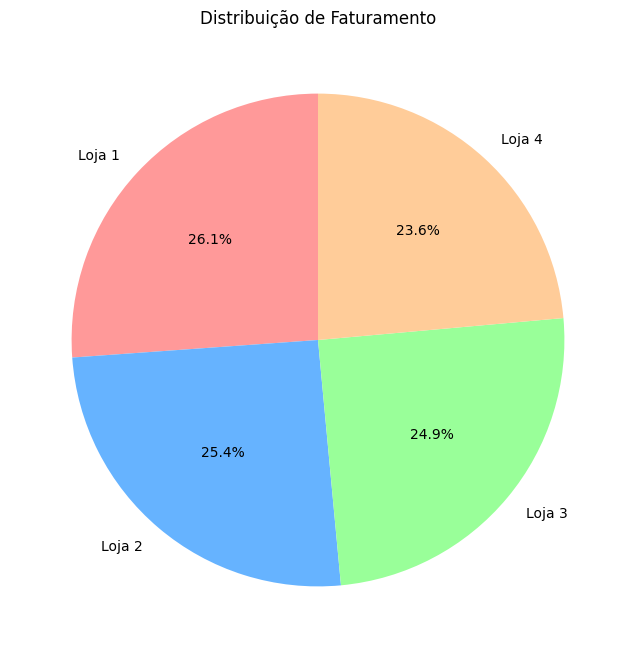

In [138]:

#Importanto a biblioteca e carregando os dados
import matplotlib.pyplot as plt

def gerar_grafico(dados):

    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())


# Dados para o gráfico de pizza
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [faturamento_loja1,faturamento_loja2, faturamento_loja3, faturamento_loja4]
cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)

# Adicionando título
plt.title('Distribuição de Faturamento')

# Exibindo o gráfico
plt.show()


# 2. Vendas por Categoria


In [139]:
import pandas as pd

def faturamento_por_categoria(lojas, nomes_lojas, exibir_resultado=True):

    resultados = {}

    for loja, nome_loja in zip(lojas, nomes_lojas):
        # Agrupando por categoria
        quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
        # Ordenando pelo número de vendas
        quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

        # Exibição opcional do resultado
        if exibir_resultado:
            print(f'\nCategorias mais populares - {nome_loja}:')
            print(quantidade_categoria)

        # Salvando no dicionário
        resultados[nome_loja] = quantidade_categoria

    return resultados

lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames das lojas
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']  # Lista dos nomes das lojas

faturamentos = faturamento_por_categoria(lojas, nomes_lojas)


Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade de Ven

# 3. Média de Avaliação das Lojas

In [140]:
def media(lojas, nomes_lojas, exibir_resultado=True):

    resultados = {}

    for loja, nome_loja in zip(lojas, nomes_lojas):
        # Calcula a média de avaliação
        media_loja = loja['Avaliação da compra'].mean()
        resultados[nome_loja] = media_loja

        # Exibe o resultado, se solicitado
        if exibir_resultado:
            print(f'Média da {nome_loja}: {media_loja:.2f}')

    return resultados

lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']  # Lista de nomes

avaliacoes_medias = media(lojas, nomes_lojas)

Média da Loja 1: 3.98
Média da Loja 2: 4.04
Média da Loja 3: 4.05
Média da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [141]:
def produtos_mais_menos_vendidos_por_loja(lojas):

    resultados = []

    for loja, nome_loja in lojas:
        # Agrupando por produto e somando os valores de vendas
        vendas_produto = loja.groupby('Produto')['Preço'].sum()

        # Produto mais vendido
        produto_mais_vendido = {
            'Produto': vendas_produto.idxmax(),
            'Total': vendas_produto.max()
        }

        # Produto menos vendido
        produto_menos_vendido = {
            'Produto': vendas_produto.idxmin(),
            'Total': vendas_produto.min()
        }

        # Adicionando resultados estruturados para cada loja
        resultados.append({
            'Loja': nome_loja,
            'Produto Mais Vendido': produto_mais_vendido,
            'Produto Menos Vendido': produto_menos_vendido
        })

    return resultados


# Lista de lojas e seus nomes
lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

# Chamando a função e armazenando os resultados
resultados = produtos_mais_menos_vendidos_por_loja(lojas)

# Exibindo os resultados
for resultado in resultados:
    print(f"\nLoja: {resultado['Loja']}")
    print(f"Produto Mais Vendido: {resultado['Produto Mais Vendido']['Produto']} - Total R$ {resultado['Produto Mais Vendido']['Total']:.2f}")
    print(f"Produto Menos Vendido: {resultado['Produto Menos Vendido']['Produto']} - Total R$ {resultado['Produto Menos Vendido']['Total']:.2f}")


Loja: Loja 1
Produto Mais Vendido: TV Led UHD 4K - Total R$ 189534.28
Produto Menos Vendido: Corda de pular - Total R$ 870.89

Loja: Loja 2
Produto Mais Vendido: Celular Plus X42 - Total R$ 150967.83
Produto Menos Vendido: Cubo mágico 8x8 - Total R$ 858.22

Loja: Loja 3
Produto Mais Vendido: Geladeira - Total R$ 133185.99
Produto Menos Vendido: Cubo mágico 8x8 - Total R$ 853.81

Loja: Loja 4
Produto Mais Vendido: Celular Plus X42 - Total R$ 128930.07
Produto Menos Vendido: Corda de pular - Total R$ 939.74


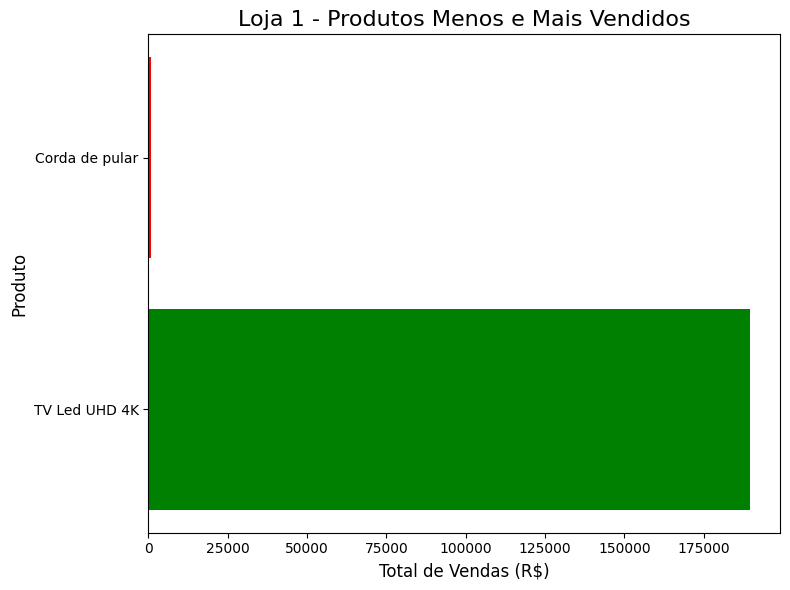

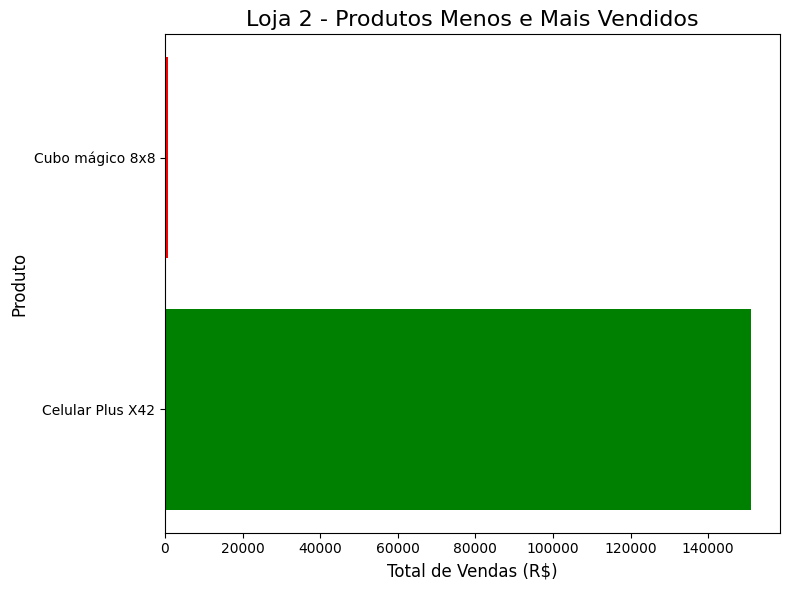

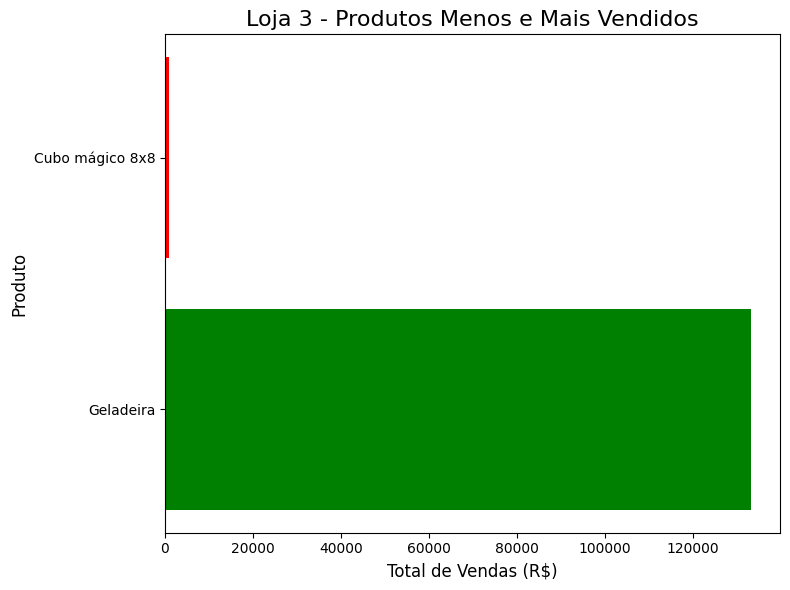

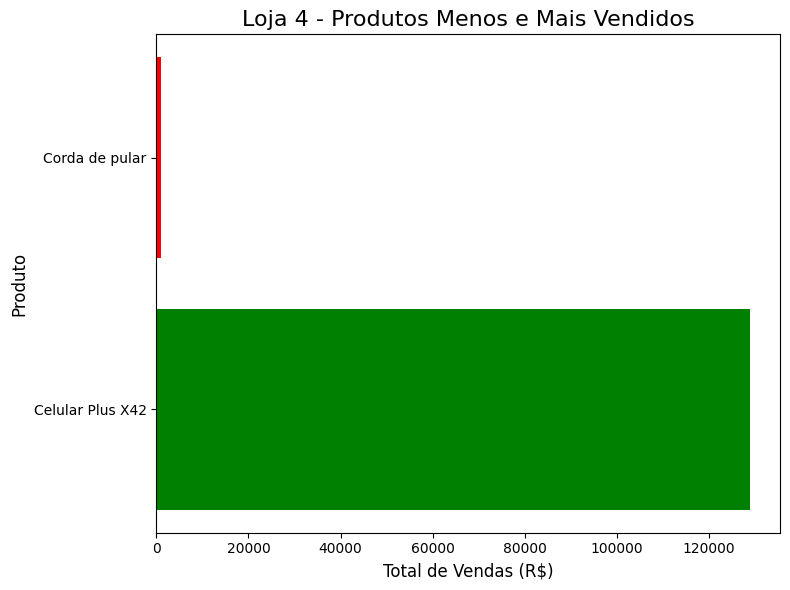

In [142]:
import matplotlib.pyplot as plt

def gerar_grafico_barras_horizontais(resultados):

    for resultado in resultados:
        nome_loja = resultado['Loja']
        mais_vendido = resultado['Produto Mais Vendido']
        menos_vendido = resultado['Produto Menos Vendido']

        # Dados para o gráfico
        produtos = [mais_vendido['Produto'], menos_vendido['Produto']]
        valores = [mais_vendido['Total'], menos_vendido['Total']]

        # Criando o gráfico de barras horizontais
        plt.figure(figsize=(8, 6))
        plt.barh(produtos, valores, color=['green', 'red'])
        plt.title(f'{nome_loja} - Produtos Menos e Mais Vendidos', fontsize=16)
        plt.xlabel('Total de Vendas (R$)', fontsize=12)
        plt.ylabel('Produto', fontsize=12)
        plt.tight_layout()

        # Exibindo o gráfico
        plt.show()

# Chamando a função para gerar gráficos com base nos resultados
gerar_grafico_barras_horizontais(resultados)

# 5. Frete Médio por Loja


In [144]:
def media_loja_frete(lojas, exibir_resultado=True):

    dados = {}

    for loja, nome_loja in lojas:
        # Calculando a média do frete
        media_frete = loja['Frete'].mean()
        dados[nome_loja] = media_frete

        # Exibindo o resultado, se solicitado
        if exibir_resultado:
            print(f'Média de Frete para {nome_loja}: R$ {media_frete:.2f}')

    return dados


# Lista de lojas e seus nomes
lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

# Chamando a função e armazenando os resultados
medias_frete = media_loja_frete(lojas)

# Exemplo de exibição dos resultados armazenados
print("\nResumo das médias de frete por loja:")
for nome_loja, media in medias_frete.items():
    print(f'{nome_loja}: R$ {media:.2f}')

Média de Frete para Loja 1: R$ 34.69
Média de Frete para Loja 2: R$ 33.62
Média de Frete para Loja 3: R$ 33.07
Média de Frete para Loja 4: R$ 31.28

Resumo das médias de frete por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


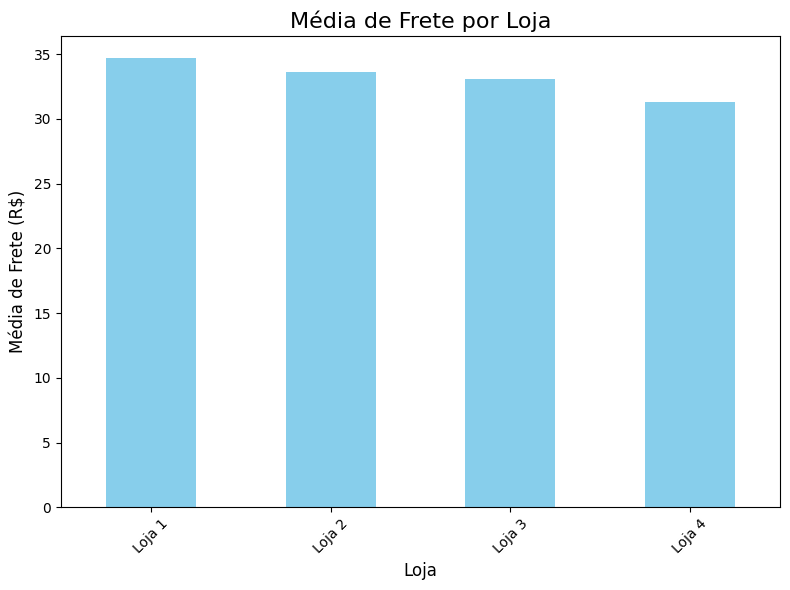

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_grafico_com_pandas(medias_frete):

    # Convertendo os dados em um DataFrame
    df_fretes = pd.DataFrame(list(medias_frete.items()), columns=['Loja', 'Média de Frete'])

    # Gerando o gráfico de barras
    df_fretes.plot(x='Loja', y='Média de Frete', kind='bar', legend=False, color='skyblue', figsize=(8, 6))
    plt.title('Média de Frete por Loja', fontsize=16)
    plt.xlabel('Loja', fontsize=12)
    plt.ylabel('Média de Frete (R$)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()


# Chamando a função com os dados das médias calculadas
gerar_grafico_com_pandas(medias_frete)